In [6]:
import mlflow

In [40]:
import os

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import mlflow.sklearn
from mlflow.data.pandas_dataset import PandasDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# mlflow settings

host_ip="192.168.8.8"
port = os.environ["MLFLOW_PORT"]

TRACKING_URI = f"http://{host_ip}:{port}/"
#ARTIFACT_LOCATION=

os.environ["LOGNAME"] = "ichiyama"

mlflow.set_tracking_uri(TRACKING_URI)

print("tracking: ", mlflow.get_tracking_uri())
print("registry: ", mlflow.get_registry_uri())

#実験idごとに決まる
#print("artifact: ", mlflow.get_artifact_uri())

tracking:  http://192.168.8.8:5001/
registry:  http://192.168.8.8:5001/


In [9]:
# dataset
dataset = fetch_california_housing(as_frame=True)
df = dataset['frame']

In [10]:
target_col = 'MedHouseVal'

X, y = df.drop(columns=[target_col]), df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# モデルの定義
model = RandomForestRegressor(
    n_estimators = 10,
    max_depth = 5,
    criterion = 'squared_error',  # 'mse'
    random_state = 0,
)

# 訓練
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [11]:
# 検証データの予測
y_pred = model.predict(X_test)

# MSE誤差の算出
mse = MSE(y_pred, y_test)
print(f"MSE = {mse:.3}")  # 小数点以下３桁まで出力

MSE = 0.487


In [12]:
# 試行関数
def train(n_estimators, max_depth):
    # モデルの定義
    model = RandomForestRegressor(
        n_estimators = n_estimators,
        max_depth = max_depth,
        criterion = 'squared_error',  # 'mse'
        random_state = 0,
    )

    # 訓練
    model.fit(X_train, y_train)

    # 検証データの予測
    y_pred = model.predict(X_test)

    # MSE誤差, R2値の算出
    mse = MSE(y_pred, y_test)
    R2 = r2_score(y_pred, y_test)

    return model, mse, R2

In [13]:
# not mlflow 

# ハイパーパラメータの水準
cand_n_estimators = [10, 100]
cand_max_depth = [1, 5, 10]

trial = 0
for n_estimators in cand_n_estimators:
    for max_depth in cand_max_depth:
        trial += 1
        model, mse, R2 = train(n_estimators, max_depth)
        # 小数点以下３桁まで出力
        print(f"trial {trial}: n_estimators={n_estimators}, max_depth={max_depth}, MSE = {mse:.3}, R2 = {R2:.3}")


trial 1: n_estimators=10, max_depth=1, MSE = 0.91, R2 = -1.33
trial 2: n_estimators=10, max_depth=5, MSE = 0.487, R2 = 0.38
trial 3: n_estimators=10, max_depth=10, MSE = 0.312, R2 = 0.676
trial 4: n_estimators=100, max_depth=1, MSE = 0.909, R2 = -1.32
trial 5: n_estimators=100, max_depth=5, MSE = 0.481, R2 = 0.382
trial 6: n_estimators=100, max_depth=10, MSE = 0.304, R2 = 0.679


In [34]:
EXPERIMENT_NAME = 'test_hello'
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

if experiment is None:  
    experiment_id = mlflow.create_experiment(
                            name=EXPERIMENT_NAME)
else: 
    experiment_id = experiment.experiment_id
    
print("id: ", experiment_id)

id:  456086732467144979


n_estimators=10, max_depth=1, MSE = 0.91, R2 = -1.33


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


n_estimators=10, max_depth=5, MSE = 0.487, R2 = 0.38


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


n_estimators=10, max_depth=10, MSE = 0.312, R2 = 0.676


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


n_estimators=100, max_depth=1, MSE = 0.909, R2 = -1.32


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


n_estimators=100, max_depth=5, MSE = 0.481, R2 = 0.382


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


n_estimators=100, max_depth=10, MSE = 0.304, R2 = 0.679


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


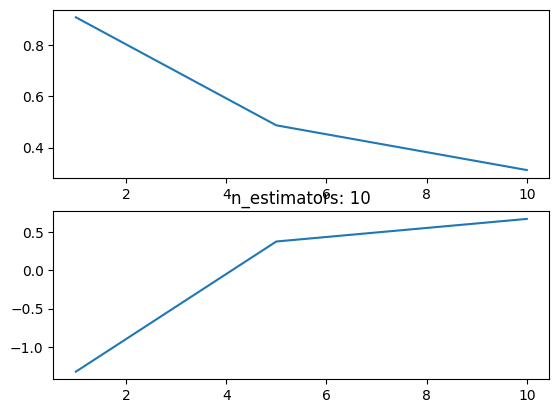

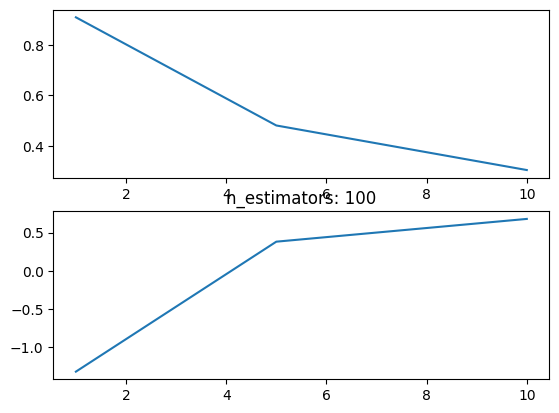

In [42]:
# mlflow 

RUN_NAME="RandomForestRegressor"

# mlflowを経由して引っ張ったdatasetにはmlflow.log_input(dataset)が使える

dataset_source_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_source_url)
dataset: PandasDataset = mlflow.data.from_pandas(df, source=dataset_source_url)

with mlflow.start_run(experiment_id = experiment_id, run_name = RUN_NAME):

    # データセット保存
    mlflow.log_artifact("test.csv")
    mlflow.log_input(dataset, context="training")

    # 実験のタグ付け
    mlflow.set_tag("mlflow.note.content", "RandomForestRegressorのハイパーパラメータ探索")
    mlflow.set_tag("mlflow.project.env", "docker")

    cand_n_estimators = [10, 100]
    cand_max_depth = [1, 5, 10]

    # パラメータ群
    mlflow.log_param("cand_n_estimators", cand_n_estimators)
    mlflow.log_param("cand_max_depth", cand_max_depth)

    for n_estimators in cand_n_estimators:

        nest_run_name =  f"n_estimators_{n_estimators}__" + RUN_NAME
        with mlflow.start_run(experiment_id = experiment_id, run_name = nest_run_name, nested=True):

            metrics_mse = []
            metrics_R2  = []
            data_dict = dict()

            for max_depth in cand_max_depth:

                md_run_name = f"max_depth_{max_depth}__" + nest_run_name
                with mlflow.start_run(experiment_id = experiment_id, run_name = md_run_name, nested=True):

                    model, mse, R2 = train(n_estimators, max_depth)

                    print(f"n_estimators={n_estimators}, max_depth={max_depth}, MSE = {mse:.3}, R2 = {R2:.3}")

                    mlflow.log_param("n_estimators", n_estimators)
                    mlflow.log_param("max_depth", max_depth)
                    mlflow.log_metric("mse", mse)
                    mlflow.log_metric("R2", R2)
                    mlflow.sklearn.log_model(model, "model")
                    
                    metrics_mse.append(mse)
                    metrics_R2.append(R2)
                    data_dict[str(max_depth)]=mse

                    # artifacts
                    features = f'test\nn_estimators={n_estimators}, max_depth={max_depth}, MSE = {mse:.3}, R2 = {R2:.3}"'
                    with open("features.txt", "w") as f:
                        f.write(features)
                    mlflow.log_artifact('features.txt')

            # 実験の総括
            mlflow.log_metrics(data_dict)

            # 画像の保存
            fig, axs = plt.subplots(2)
            plt.title(f"n_estimators: {n_estimators}")
            axs[0].plot(cand_max_depth, metrics_mse)
            axs[1].plot(cand_max_depth, metrics_R2)
            mlflow.log_figure(fig, f"plot_n_estimators_{n_estimators}.png")


In [43]:
data_dict

{'1': 0.9092017114676325, '5': 0.48058794937785154, '10': 0.30396417176212714}

In [44]:
from mlflow.tracking import fluent
fluent._active_run_stack

[]

In [17]:
mlflow.end_run()
fluent._active_run_stack


[]